In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=8, suppress=True, linewidth=120) #prinintg from numpy
print(tf.__version__)

2.11.0


In [ ]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# tf.debugging.set_log_device_placement(True)

# # Create some tensors
# a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
# b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
# c = tf.matmul(a, b)

# print(c)

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [3]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [4]:
X_train = X_train / 255
X_test = X_test / 255

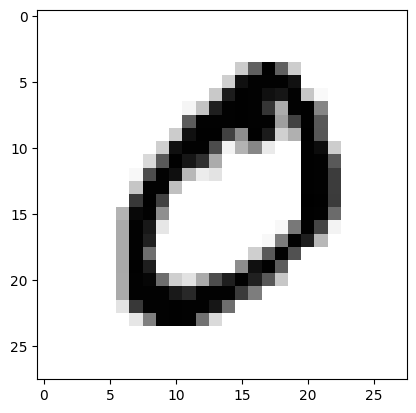

In [5]:
plt.imshow(X_train[1], cmap='gray_r') 
# plt.axis('off')

In [ ]:
# for i in range(1,11):
#     plt.subplot(1,10,i)
#     plt.axis('off')
#     plt.imshow(X_train[i-1], cmap='gray_r')
#     plt.title(y_train[i-1], color='black', fontsize=10)
# plt.show()

In [ ]:
# OUR MODELS

#SMALL MODEL
model_small = Sequential()
model_small.add(Flatten(input_shape=(28,28)))
model_small.add(Dense(units=8, activation='relu'))
model_small.add(Dropout(0.2))#20% of data for dropout
model_small.add(Dense(units=10, activation='softmax')) #output

model_small.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_small.summary()



In [ ]:
# model trening- fit ! 
history_small = model_small.fit(X_train, y_train, epochs=30, batch_size=50, validation_split=0.2, verbose=0)

In [ ]:
metrics_small=pd.DataFrame(history_small.history)
metrics_small.head()

In [6]:
# OUR MODELS

#BASIC MODEL
model_basic = Sequential()
model_basic.add(Flatten(input_shape=(28,28)))
model_basic.add(Dense(units=128, activation='relu'))
model_basic.add(Dropout(0.2))#20% of data for dropout
model_basic.add(Dense(units=10, activation='softmax')) #output

model_basic.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# model trening- fit ! 
history_basic = model_basic.fit(X_train, y_train, epochs=30, batch_size=50, validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 5s 4ms/step - loss: 0.3592 - accuracy: 0.8963 - val_loss: 0.1698 - val_accuracy: 0.9519
Epoch 2/30
960/960 [==============================] - 4s 4ms/step - loss: 0.1733 - accuracy: 0.9486 - val_loss: 0.1260 - val_accuracy: 0.9622
Epoch 3/30
960/960 [==============================] - 5s 5ms/step - loss: 0.1301 - accuracy: 0.9614 - val_loss: 0.1055 - val_accuracy: 0.9687
Epoch 4/30
960/960 [==============================] - 5s 5ms/step - loss: 0.1041 - accuracy: 0.9697 - val_loss: 0.0986 - val_accuracy: 0.9693
Epoch 5/30
960/960 [==============================] - 4s 5ms/step - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.0878 - val_accuracy: 0.9741
Epoch 6/30
960/960 [==============================] - 4s 4ms/step - loss: 0.0759 - accuracy: 0.9771 - val_loss: 0.0869 - val_accuracy: 0.9747
Epoch 7/30
960/960 [==============================] - 4s 4ms/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 0.0844 - val_accuracy: 0.9754
Epoch 

In [8]:
metrics_basic=pd.DataFrame(history_basic.history)
metrics_basic.head()

,loss,accuracy,val_loss,val_accuracy
0,0.359197,0.896250,0.169836,0.951917
1,0.173348,0.948583,0.125992,0.962250
2,0.130116,0.961438,0.105528,0.968667
3,0.104073,0.969708,0.098619,0.969250
4,0.088057,0.973521,0.087750,0.974083


In [ ]:
# loss_test_basic, accuracy_test_basic =  model_big.evaluate(X_test, y_test)

In [ ]:
# OUR MODELS

#BIG MODEL
model_big = Sequential()
model_big.add(Flatten(input_shape=(28,28)))
model_big.add(Dense(units=256, activation='relu'))
model_big.add(Dense(units=512, activation='relu'))
model_big.add(Dropout(0.2))#20% of data for dropout on reg.
model_big.add(Dense(units=10, activation='softmax')) #output

model_big.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_big.summary()


In [ ]:
history_big = model_big.fit(X_train, y_train, epochs=30, batch_size=50, validation_split=0.2)

In [ ]:
metrics_big=pd.DataFrame(history_big.history)
metrics_big.head()

In [ ]:
## Three models and its accuracy/plots below. As we can see our basic model is doing almost as good as the big one if we look at the accuracy.
## It means that we don`t need that kind of complex architecture. Loss and accuracy for our small model may be a little weak for us.
## Big model overfits very quickly

## SMALL MODEL - one hidden layer with 8 units
## BASIC MODEL - one hidden layer with 128 units
## BIG MODEL - two hidden layer with 512/256 units

fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Scatter(y=metrics_small['loss'],name='loss_small'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics_small['accuracy'],name='accuracy_small'), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics_small['val_loss'],name='val_loss_small'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics_small['val_accuracy'],name='val_accuracy_small'), row=2, col=1)

fig.add_trace(go.Scatter(y=metrics_basic['loss'],name='loss_basic'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics_basic['accuracy'],name='accuracy_basic'), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics_basic['val_loss'],name='val_loss_basic'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics_basic['val_accuracy'],name='val_accuracy_basic'), row=2, col=1)

fig.add_trace(go.Scatter(y=metrics_big['loss'],name='loss_big'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics_big['accuracy'],name='accuracy_big'), row=2, col=1)
fig.add_trace(go.Scatter(y=metrics_big['val_loss'],name='val_loss_big'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics_big['val_accuracy'],name='val_accuracy_big'), row=2, col=1)

fig.update_layout(width=1000)

In [30]:
loss_basic, accuracy_basic =  model_basic.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1372 - accuracy: 0.9796


In [ ]:
loss_small, accuracy_small =  model_small.evaluate(X_test, y_test)

In [ ]:
loss_big, accuracy_big =  model_big.evaluate(X_test, y_test)

In [70]:
## We could try to find "the best models" using checkpoint and earlystopping. Lets find out how many epochs is enough to get the best model out from basic and the big model
## We use vaL_accuracy as monitor and 5 epochs for earlystopping and saving weights to the file
## When looking for 'the best big model' we should monit loss metric - this model overfit very quickly as we can see at the plot


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# basic model
filepath ='best_basic_model_weights.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', save_best_only=True, save_weights_only=True, verbose=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience = 5)

In [71]:
history__best_basic = model_basic.fit(X_train, y_train, epochs=10, batch_size=50, validation_split=0.2, callbacks=[checkpoint, es])

Epoch 1/10
960/960 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9970
Epoch 1: val_accuracy improved from -inf to 0.98033, saving model to best_basic_model_weights.hdf5
960/960 [==============================] - 5s 5ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.1560 - val_accuracy: 0.9803
Epoch 2/10
952/960 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9968
Epoch 2: val_accuracy did not improve from 0.98033
960/960 [==============================] - 4s 4ms/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.1535 - val_accuracy: 0.9803
Epoch 3/10
955/960 [============================>.] - ETA: 0s - loss: 0.0090 - accuracy: 0.9970
Epoch 3: val_accuracy improved from 0.98033 to 0.98092, saving model to best_basic_model_weights.hdf5
960/960 [==============================] - 4s 5ms/step - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.1651 - val_accuracy: 0.9809
Epoch 4/10
950/960 [============================>.] - ETA: 0s - los

In [27]:
#BEST BASIC MODEL - loading weights from the file

best_model_basic = Sequential()
best_model_basic.add(Flatten(input_shape=(28,28)))
best_model_basic.add(Dense(units=128, activation='relu'))
best_model_basic.add(Dropout(0.2))#20% of data for dropout
best_model_basic.add(Dense(units=10, activation='softmax')) #output

best_model_basic.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
best_model_basic.load_weights('best_basic_model_weights.hdf5')

best_model_basic.summary()
best_model_basic.save('my_best_basic_model.h5')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [72]:
loss_basic, accuracy_basic =  model_basic.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9795


In [73]:
metrics_best_basic=pd.DataFrame(history__best_basic.history)
metrics_best_basic.head()

,loss,accuracy,val_loss,val_accuracy
0,0.008613,0.996958,0.155979,0.980333
1,0.009671,0.996792,0.153532,0.980250
2,0.008958,0.997063,0.165116,0.980917
3,0.010169,0.996708,0.156386,0.979583
4,0.006684,0.997583,0.161739,0.980333


In [74]:
reconstructed_model.load_weights('best_basic_model_weights.hdf5')

In [75]:
reconstructed_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1534 - accuracy: 0.0990


[0.15337024629116058, 0.0989999994635582]

In [14]:
#big  model

filepath ='best_big_model_weights.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
es = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 5)
history__best_big = model_big.fit(X_train, y_train, epochs=30, batch_size=50, validation_split=0.2, callbacks=[checkpoint, es])

NameError: name 'model_big' is not defined

In [ ]:
#BEST BIG MODEL - loading weights from the file

best_model_big = Sequential()
best_model_big.add(Flatten(input_shape=(28,28)))
best_model_big.add(Dense(units=256, activation='relu'))
best_model_big.add(Dense(units=512, activation='relu'))
best_model_big.add(Dropout(0.2))#20% of data for dropout on reg.
best_model_big.add(Dense(units=10, activation='softmax')) #output

best_model_big.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
best_model_big.load_weights('best_big_model_weights.hdf5')

best_model_big.save('my_best_big_model.h5')
best_model_big.summary()

In [ ]:
loss_best_model_big, accuracy_best_model_big =  best_model_big.evaluate(X_test, y_test)